In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
mem = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/member.csv")
tran = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/transaction.csv")

* 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고 사용 여부 데이터를 수집
* mem: 고객id, 최근 방문일, 사는지역, 추천여부, 주요접속채널, 쿠폰 사용 여부
* transaction: 고객id, 구매수량, 총 구매금액 정보가 있음
* 전통적 마케팅 분석 방법인 RFM 기법을 사용해 고객 데이터에서 파생변수 생성 후 분석
* Recency: 현재일 - 최근 구매일
* Frequency: 구매 빈도
* Monetary: 구매 금액

* 종속변수: conversion  => 고객이 프로모션에 반응 했는가? 1 = yes, 0 = no

In [40]:
mem.head()

id  recency   zip_code  is_referral channel  conversion
0  906145       10  Surburban            0   Phone           0
1  184478        6      Rural            1     Web           0
2  394235        7  Surburban            1     Web           0
3  130152        9      Rural            1     Web           0
4  940352        2      Urban            0     Web           0

In [41]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [42]:
mem.describe()

id       recency   is_referral    conversion
count   64000.000000  64000.000000  64000.000000  64000.000000
mean   550694.137797      5.763734      0.502250      0.146781
std    259105.689773      3.507592      0.499999      0.353890
min    100001.000000      1.000000      0.000000      0.000000
25%    326772.000000      2.000000      0.000000      0.000000
50%    551300.000000      6.000000      1.000000      0.000000
75%    774914.500000      9.000000      1.000000      0.000000
max    999997.000000     12.000000      1.000000      1.000000

<Axes: >

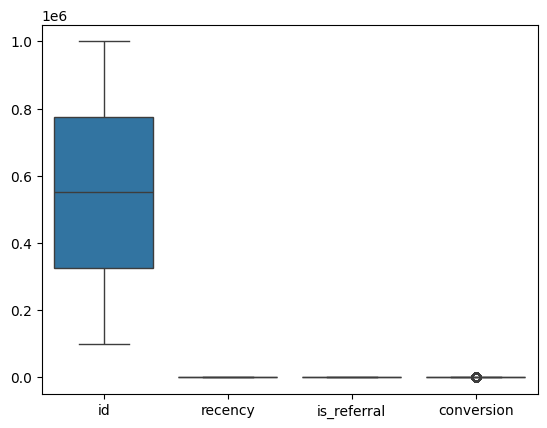

In [43]:
sns.boxplot(mem)

In [44]:
tran.head()

id  num_item  total_amount
0  906145         5         34000
1  906145         1         27000
2  906145         4         33000
3  184478         4         29000
4  394235         4         33000

In [45]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [46]:
tran.describe()

id       num_item   total_amount
count  196836.000000  196836.000000  196836.000000
mean   550557.552932       3.078365   21837.102969
std    259254.795613       1.478408    8218.005565
min    100001.000000       1.000000    8000.000000
25%    326719.000000       2.000000   15000.000000
50%    550918.000000       3.000000   22000.000000
75%    774916.000000       4.000000   29000.000000
max    999997.000000       6.000000   38000.000000

<Axes: >

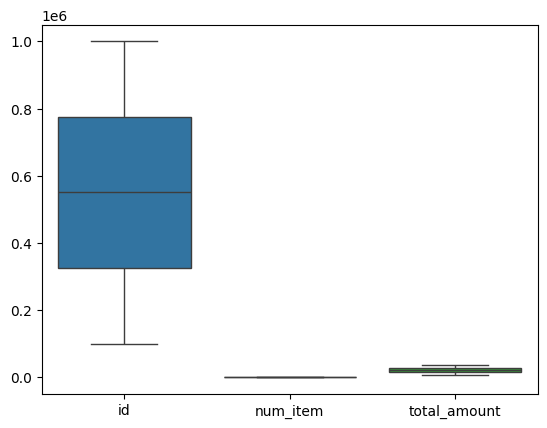

In [47]:
sns.boxplot(tran)

In [48]:
mem.head()

id  recency   zip_code  is_referral channel  conversion
0  906145       10  Surburban            0   Phone           0
1  184478        6      Rural            1     Web           0
2  394235        7  Surburban            1     Web           0
3  130152        9      Rural            1     Web           0
4  940352        2      Urban            0     Web           0

In [49]:
mem['id'].nunique()

64000

In [50]:
mem['recency'].describe()

count    64000.000000
mean         5.763734
std          3.507592
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: recency, dtype: float64

<Axes: xlabel='recency', ylabel='Count'>

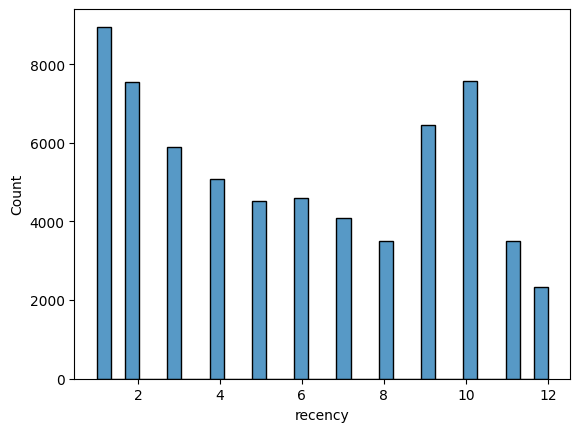

In [51]:
sns.histplot(mem['recency'])

In [52]:
mem['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

In [53]:
mem['is_referral'].value_counts()

is_referral
1    32144
0    31856
Name: count, dtype: int64

In [54]:
mem['channel'].value_counts()

channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64

In [55]:
mem['conversion'].value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [56]:
9394 / (9394 +54606)

0.14678125

In [57]:
mem.groupby('recency')['conversion'].value_counts(sort=False)

recency  conversion
1        0             7224
         1             1728
2        0             6197
         1             1340
3        0             4922
         1              982
4        0             4321
         1              756
5        0             3868
         1              642
6        0             3957
         1              648
7        0             3532
         1              546
8        0             3048
         1              447
9        0             5707
         1              734
10       0             6713
         1              852
11       0             3081
         1              423
12       0             2036
         1              296
Name: count, dtype: int64

In [58]:
1728 / (1728+7224)              

0.19302949061662197

In [59]:
mem.groupby('recency')['conversion'].describe()

count      mean       std  min  25%  50%  75%  max
recency                                                     
1        8952.0  0.193029  0.394698  0.0  0.0  0.0  0.0  1.0
2        7537.0  0.177790  0.382361  0.0  0.0  0.0  0.0  1.0
3        5904.0  0.166328  0.372406  0.0  0.0  0.0  0.0  1.0
4        5077.0  0.148907  0.356032  0.0  0.0  0.0  0.0  1.0
5        4510.0  0.142350  0.349448  0.0  0.0  0.0  0.0  1.0
6        4605.0  0.140717  0.347767  0.0  0.0  0.0  0.0  1.0
7        4078.0  0.133889  0.340575  0.0  0.0  0.0  0.0  1.0
8        3495.0  0.127897  0.334023  0.0  0.0  0.0  0.0  1.0
9        6441.0  0.113957  0.317784  0.0  0.0  0.0  0.0  1.0
10       7565.0  0.112624  0.316153  0.0  0.0  0.0  0.0  1.0
11       3504.0  0.120719  0.325847  0.0  0.0  0.0  0.0  1.0
12       2332.0  0.126930  0.332966  0.0  0.0  0.0  0.0  1.0

recency가 짧을 수록 프로모션 성공률이 높다.

In [60]:
mem.groupby('is_referral')['conversion'].value_counts()

is_referral  conversion
0            0             26343
             1              5513
1            0             28263
             1              3881
Name: count, dtype: int64

In [61]:
mem.groupby('is_referral')['conversion'].describe()

count      mean       std  min  25%  50%  75%  max
is_referral                                                      
0            31856.0  0.173060  0.378305  0.0  0.0  0.0  0.0  1.0
1            32144.0  0.120738  0.325828  0.0  0.0  0.0  0.0  1.0

In [62]:
mem.groupby('channel')['conversion'].value_counts()

channel       conversion
Multichannel  0              6429
              1              1333
Phone         0             24458
              1              3563
Web           0             23719
              1              4498
Name: count, dtype: int64

In [63]:
mem.groupby('channel')['conversion'].describe()

count      mean       std  min  25%  50%  75%  max
channel                                                           
Multichannel   7762.0  0.171734  0.377173  0.0  0.0  0.0  0.0  1.0
Phone         28021.0  0.127155  0.333152  0.0  0.0  0.0  0.0  1.0
Web           28217.0  0.159407  0.366062  0.0  0.0  0.0  0.0  1.0

In [64]:
tran_total = tran.groupby('id')[['num_item', 'total_amount']].sum()
tran_total

num_item  total_amount
id                            
100001         7         52000
100008         5         26000
100032         8         62000
100036        15        129000
100070        13         85000
...          ...           ...
999932         5         32000
999981         8         91000
999990         9         84000
999995         2         27000
999997         2         13000

[64000 rows x 2 columns]

In [65]:
tran['id'].nunique()

64000

고객의 총구매개수, 총구매액, 평균구매액 

In [66]:
tran_total['mean_amount'] = tran_total['total_amount'] / tran_total['num_item']
tran_total

num_item  total_amount   mean_amount
id                                          
100001         7         52000   7428.571429
100008         5         26000   5200.000000
100032         8         62000   7750.000000
100036        15        129000   8600.000000
100070        13         85000   6538.461538
...          ...           ...           ...
999932         5         32000   6400.000000
999981         8         91000  11375.000000
999990         9         84000   9333.333333
999995         2         27000  13500.000000
999997         2         13000   6500.000000

[64000 rows x 3 columns]

고객의 방문 빈도

In [67]:
frequency = tran['id'].value_counts(sort=False)

In [68]:
frequency

id
906145    3
184478    1
394235    2
130152    4
940352    1
         ..
233143    5
302540    2
362521    5
536246    4
927617    4
Name: count, Length: 64000, dtype: int64

In [69]:
print(type(frequency))

<class 'pandas.core.series.Series'>


In [70]:
frequency.index

Index([906145, 184478, 394235, 130152, 940352, 872298, 103308, 283516, 101354,
       663001,
       ...
       463254, 220271, 710131, 964015, 881987, 233143, 302540, 362521, 536246,
       927617],
      dtype='int64', name='id', length=64000)

In [71]:
tran_total['frequency'] = frequency

In [72]:
tran_total

num_item  total_amount   mean_amount  frequency
id                                                     
100001         7         52000   7428.571429          2
100008         5         26000   5200.000000          1
100032         8         62000   7750.000000          3
100036        15        129000   8600.000000          5
100070        13         85000   6538.461538          4
...          ...           ...           ...        ...
999932         5         32000   6400.000000          1
999981         8         91000  11375.000000          4
999990         9         84000   9333.333333          3
999995         2         27000  13500.000000          1
999997         2         13000   6500.000000          1

[64000 rows x 4 columns]

merge, join

mem

In [73]:
mem = mem.set_index('id')

In [74]:
data = mem.join(tran_total)
data

recency   zip_code  is_referral       channel  conversion  num_item  \
id                                                                            
906145       10  Surburban            0         Phone           0        10   
184478        6      Rural            1           Web           0         4   
394235        7  Surburban            1           Web           0         8   
130152        9      Rural            1           Web           0         7   
940352        2      Urban            0           Web           0         3   
...         ...        ...          ...           ...         ...       ...   
838295       10      Urban            0           Web           0        14   
547316        5      Urban            1         Phone           0         9   
131575        6      Urban            1         Phone           0         8   
603659        1  Surburban            1  Multichannel           0        16   
254229        1  Surburban            0           Web           0        17   

        total_amount   mean_amount  frequency  
id                                             
906145         94000   9400.000000          3  
184478         29000   7250.000000          1  
394235         41000   5125.000000          2  
130152         83000  11857.142857          4  
940352         31000  10333.333333          1  
...              ...           ...        ...  
838295        104000   7428.571429          4  
547316         89000   9888.888889          5  
131575         61000   7625.000000          2  
603659        108000   6750.000000          5  
254229        122000   7176.470588          5  

[64000 rows x 9 columns]

In [75]:
data

recency   zip_code  is_referral       channel  conversion  num_item  \
id                                                                            
906145       10  Surburban            0         Phone           0        10   
184478        6      Rural            1           Web           0         4   
394235        7  Surburban            1           Web           0         8   
130152        9      Rural            1           Web           0         7   
940352        2      Urban            0           Web           0         3   
...         ...        ...          ...           ...         ...       ...   
838295       10      Urban            0           Web           0        14   
547316        5      Urban            1         Phone           0         9   
131575        6      Urban            1         Phone           0         8   
603659        1  Surburban            1  Multichannel           0        16   
254229        1  Surburban            0           Web           0        17   

        total_amount   mean_amount  frequency  
id                                             
906145         94000   9400.000000          3  
184478         29000   7250.000000          1  
394235         41000   5125.000000          2  
130152         83000  11857.142857          4  
940352         31000  10333.333333          1  
...              ...           ...        ...  
838295        104000   7428.571429          4  
547316         89000   9888.888889          5  
131575         61000   7625.000000          2  
603659        108000   6750.000000          5  
254229        122000   7176.470588          5  

[64000 rows x 9 columns]

In [76]:
data.groupby('num_item')['conversion'].value_counts(sort=False)

num_item  conversion
1         0             2167
2         0             2585
          1               64
3         0             3227
          1              139
4         0             3666
          1              258
5         0             4546
          1              343
6         0             3288
          1              458
7         0             3446
          1              616
8         0             3674
          1              655
9         0             3593
          1              624
10        0             3634
          1              690
11        0             3381
          1              693
12        0             3213
          1              663
13        0             3127
          1              552
14        0             2723
          1              586
15        0             2338
          1              547
16        0             1899
          1              515
17        0             1453
          1              475
18        0           

구매량이 22개 이상인 경우 프로모션에 응할 가능성이 높다.

In [77]:
data.groupby('conversion')['total_amount'].describe()

count          mean           std      min      25%      50%  \
conversion                                                                   
0           54606.0  64648.903051  33453.777907   8000.0  35000.0  63000.0   
1            9394.0  81766.020864  30989.933757  18000.0  57000.0  80000.0   

                 75%       max  
conversion                      
0            91000.0  165000.0  
1           105000.0  184000.0

구매 총 금액과는 크게 관계가 없다.

In [78]:
data.groupby('frequency')['conversion'].value_counts()

frequency  conversion
1          0             10809
2          0             10979
           1              2377
3          0             10902
           1              2418
4          0             10955
           1              2265
5          0             10961
           1              2334
Name: count, dtype: int64

구매 횟수도 크게 상관이 없다.

In [79]:
data.columns

Index(['recency', 'zip_code', 'is_referral', 'channel', 'conversion',
       'num_item', 'total_amount', 'mean_amount', 'frequency'],
      dtype='object')

In [80]:
data_corr = data[['recency', 'is_referral', 'conversion',
       'num_item', 'total_amount', 'mean_amount', 'frequency']].corr()

<Axes: >

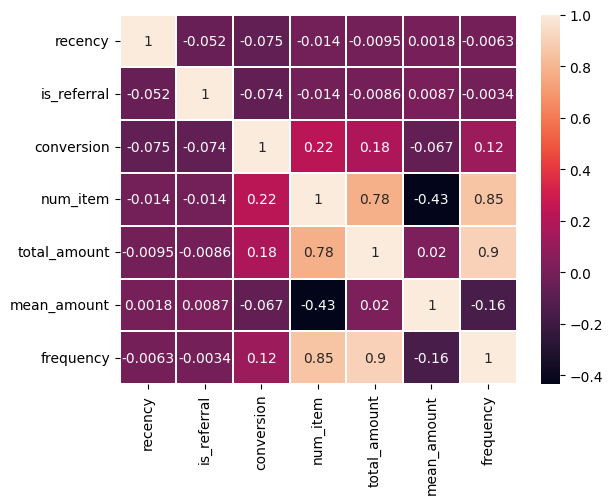

In [81]:
sns.heatmap(data_corr, annot=True, linewidths=0.1)

In [82]:
data.head()

recency   zip_code  is_referral channel  conversion  num_item  \
id                                                                      
906145       10  Surburban            0   Phone           0        10   
184478        6      Rural            1     Web           0         4   
394235        7  Surburban            1     Web           0         8   
130152        9      Rural            1     Web           0         7   
940352        2      Urban            0     Web           0         3   

        total_amount   mean_amount  frequency  
id                                             
906145         94000   9400.000000          3  
184478         29000   7250.000000          1  
394235         41000   5125.000000          2  
130152         83000  11857.142857          4  
940352         31000  10333.333333          1

In [83]:
data.groupby('zip_code')['conversion'].value_counts()

zip_code   conversion
Rural      0              7764
           1              1799
Surburban  0             24749
           1              4027
Urban      0             22093
           1              3568
Name: count, dtype: int64

In [84]:
data.groupby('zip_code')['conversion'].mean()

zip_code
Rural        0.188121
Surburban    0.139943
Urban        0.139044
Name: conversion, dtype: float64

시골이 프로모션 참여율이 높다.

In [85]:
data = data.drop(['total_amount', 'frequency'], axis=1)
data

recency   zip_code  is_referral       channel  conversion  num_item  \
id                                                                            
906145       10  Surburban            0         Phone           0        10   
184478        6      Rural            1           Web           0         4   
394235        7  Surburban            1           Web           0         8   
130152        9      Rural            1           Web           0         7   
940352        2      Urban            0           Web           0         3   
...         ...        ...          ...           ...         ...       ...   
838295       10      Urban            0           Web           0        14   
547316        5      Urban            1         Phone           0         9   
131575        6      Urban            1         Phone           0         8   
603659        1  Surburban            1  Multichannel           0        16   
254229        1  Surburban            0           Web           0        17   

         mean_amount  
id                    
906145   9400.000000  
184478   7250.000000  
394235   5125.000000  
130152  11857.142857  
940352  10333.333333  
...              ...  
838295   7428.571429  
547316   9888.888889  
131575   7625.000000  
603659   6750.000000  
254229   7176.470588  

[64000 rows x 7 columns]

In [86]:
data = pd.get_dummies(data, drop_first=True)
data

recency  is_referral  conversion  num_item   mean_amount  \
id                                                                 
906145       10            0           0        10   9400.000000   
184478        6            1           0         4   7250.000000   
394235        7            1           0         8   5125.000000   
130152        9            1           0         7  11857.142857   
940352        2            0           0         3  10333.333333   
...         ...          ...         ...       ...           ...   
838295       10            0           0        14   7428.571429   
547316        5            1           0         9   9888.888889   
131575        6            1           0         8   7625.000000   
603659        1            1           0        16   6750.000000   
254229        1            0           0        17   7176.470588   

        zip_code_Surburban  zip_code_Urban  channel_Phone  channel_Web  
id                                                                      
906145                True           False           True        False  
184478               False           False          False         True  
394235                True           False          False         True  
130152               False           False          False         True  
940352               False            True          False         True  
...                    ...             ...            ...          ...  
838295               False            True          False         True  
547316               False            True           True        False  
131575               False            True           True        False  
603659                True           False          False        False  
254229                True           False          False         True  

[64000 rows x 9 columns]

# 독립 변수들 간에 단위 차이가 너무 클 때 => 스케일링 필요
* Min-Max scaler: 모든 숫자를 0-1사이의 숫자로 변환 - 데이터 분포의 모양을 그대로 유지
* Standard Scaler: 평균을 0, 표준편차를 1로 하는 정규분포의 형태로 변환 - 데이터 분포 모양이 정규 분포로 바뀜
* Robust Scaler: 사분위수를 이용해서 데이터를 스케일링 - 데이터에 이상값이 있을 때 영향을 받지 않음.


In [87]:
X = data.drop('conversion', axis=1)
y = data['conversion']

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
ss = StandardScaler()
std_X = ss.fit_transform(X)
std_X

array([[ 1.20775141, -1.00451017,  0.10566371, ..., -0.81811885,
         1.1331378 , -0.88800834],
       [ 0.06735889,  0.99551008, -1.08536763, ..., -0.81811885,
        -0.8825052 ,  1.12611555],
       [ 0.35245702,  0.99551008, -0.29134674, ..., -0.81811885,
        -0.8825052 ,  1.12611555],
       ...,
       [ 0.06735889,  0.99551008, -0.29134674, ...,  1.2223163 ,
         1.1331378 , -0.88800834],
       [-1.35813177,  0.99551008,  1.29669505, ..., -0.81811885,
        -0.8825052 , -0.88800834],
       [-1.35813177, -1.00451017,  1.49520028, ..., -0.81811885,
        -0.8825052 ,  1.12611555]])

In [90]:
y.value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(std_X, y, test_size=0.4, stratify=y, random_state=100)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=100)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [94]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)
pred = knn.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))
print("="*50, "test", "="*50)
pred_test = knn.predict(X_test)
print(accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))

0.835703125
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10921
           1       0.31      0.09      0.14      1879

    accuracy                           0.84     12800
   macro avg       0.58      0.53      0.53     12800
weighted avg       0.78      0.84      0.80     12800

================================================== test ==================================================
0.83578125
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10921
           1       0.32      0.10      0.15      1879

    accuracy                           0.84     12800
   macro avg       0.59      0.53      0.53     12800
weighted avg       0.78      0.84      0.80     12800



In [95]:
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))
    print("="*50, "test", "="*50)
    pred_test = knn.predict(X_test)
    print(i, accuracy_score(y_test, pred_test))
    print(i, classification_report(y_test, pred_test))

1 0.7734375
1               precision    recall  f1-score   support

           0       0.87      0.87      0.87     10921
           1       0.22      0.22      0.22      1879

    accuracy                           0.77     12800
   macro avg       0.54      0.54      0.54     12800
weighted avg       0.77      0.77      0.77     12800

================================================== test ==================================================
1 0.776484375
1               precision    recall  f1-score   support

           0       0.87      0.87      0.87     10921
           1       0.23      0.23      0.23      1879

    accuracy                           0.78     12800
   macro avg       0.55      0.55      0.55     12800
weighted avg       0.77      0.78      0.78     12800

2 0.843203125
2               precision    recall  f1-score   support

           0       0.86      0.98      0.91     10921
           1       0.32      0.06      0.10      1879

    accuracy                 

22 0.854375
22               precision    recall  f1-score   support

           0       0.86      1.00      0.92     10921
           1       0.62      0.02      0.04      1879

    accuracy                           0.85     12800
   macro avg       0.74      0.51      0.48     12800
weighted avg       0.82      0.85      0.79     12800

================================================== test ==================================================
22 0.855078125
22               precision    recall  f1-score   support

           0       0.86      1.00      0.92     10921
           1       0.66      0.03      0.05      1879

    accuracy                           0.86     12800
   macro avg       0.76      0.51      0.49     12800
weighted avg       0.83      0.86      0.79     12800

23 0.854140625
23               precision    recall  f1-score   support

           0       0.86      1.00      0.92     10921
           1       0.57      0.03      0.05      1879

    accuracy            

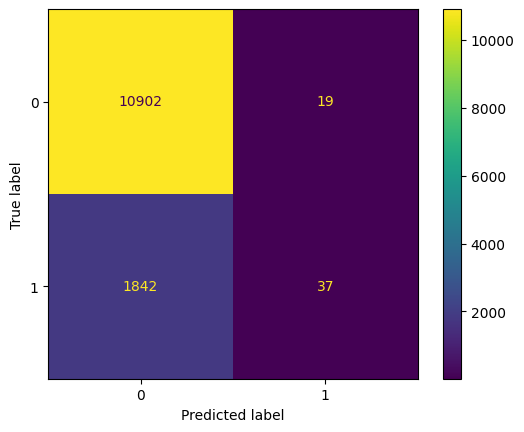

In [96]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [97]:
(10902 +37) / (10902+19+1842+37)

0.854609375

In [98]:
1842 / (1842 +37)

0.9803086748270357

In [99]:
from sklearn.metrics import recall_score, confusion_matrix

In [100]:
print(recall_score(y_test, pred_test))

0.019691325172964343


In [101]:
37 / (37+ 19)

0.6607142857142857

In [102]:
print(confusion_matrix(y_test, pred_test))

[[10902    19]
 [ 1842    37]]


In [107]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(roc_auc_score(y_test, pred_test))

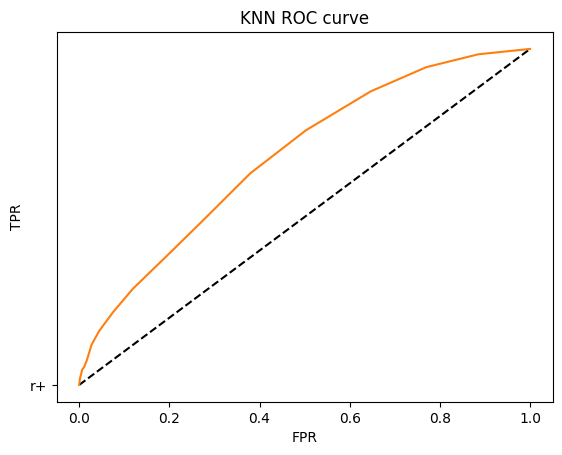

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNN ROC curve')
plt.show()

# 서포트벡터 SVC를 사용해서 분석
# 클래스 불균형 해소를 위한 데이터 증폭/축소
# RandomizedSearchCV를 이용한 SVC 하이퍼 파라미터 튜닝

### 서포트벡터 SVC
* 커널 트릭
    * 선형 분리
    * 커널 흡수

In [104]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

In [114]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [109]:
over = SMOTE(sampling_strategy=0.1)  # 소수 클래스 샘플을 10%까지 증폭
under = RandomUnderSampler(sampling_strategy=0.5)  # 다수 클래스 샘플을 50%까지 축소

pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [111]:
# SMOTE를 사용하여 소수 클래스 샘플을 증폭
smote = SMOTE(sampling_strategy=0.5)  # 소수 클래스 샘플을 50%로 증폭

# 언더샘플링을 사용하여 다수 클래스 샘플을 축소
under = RandomUnderSampler(sampling_strategy=0.7)  # 다수 클래스 샘플을 70%로 축소

# SMOTE와 언더샘플링을 결합한 파이프라인 생성
pipeline = Pipeline(steps=[('o', smote), ('u', under)])

In [115]:
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# 리샘플링 전후의 클래스 분포 확인
print(f"Before resampling: {Counter(y)}")
print(f"After resampling: {Counter(y_resampled)}")

Before resampling: Counter({0: 54606, 1: 9394})
After resampling: Counter({0: 39004, 1: 27303})


In [116]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [117]:
X_train, X_valid, y_train, y_valid = train_test_split(std_X, y, test_size=0.3, random_state=42)

In [122]:
# SVM 모델 생성 (RBF 커널 사용)
svc = SVC(kernel='rbf', C=1, gamma='scale')
# rbf는 Radial Basis Function(방사 기저 함수) 커널
# 선형 분류 문제
# C는 규제 파라미터로, 모델의 복잡도를 제어하는 역할
# gamma는 RBF 커널의 영향을 제어하는 파라미터


# 모델 학습
svc.fit(X_train, y_train)

# 검증 데이터에 대해 예측
pred = svc.predict(X_valid)

# 성능 평가
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8543229166666667
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     16389
           1       0.94      0.01      0.01      2811

    accuracy                           0.85     19200
   macro avg       0.90      0.50      0.47     19200
weighted avg       0.87      0.85      0.79     19200



In [119]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
rms_params = dict(C=[0.1, 1, 10, 100, 1000], gamma=['scale', 'auto', 0.001, 0.01, 0.1, 1], kernel=['linear', 'rbf', 'poly', 'sigmoid'], class_weight=[None, 'balanced'])

In [126]:
rand_cv = RandomizedSearchCV(SVC(), param_distributions=rms_params, n_iter=50, cv=5, n_jobs=-1, verbose=3, random_state=77)

In [ ]:
rand_cv.fit(X_train, y_train)

# 검증 세트에 대한 예측
y_pred = rand_cv.predict(X_valid)

# 평가 결과 출력
print("최적 하이퍼파라미터 :", rand_cv.best_params_)
print(f"최고 예측 정확도 : {rand_cv.best_score_:.4f}")
print(accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

# CV 결과에서 사용할 수 있는 키 출력
print(sorted(random_search.cv_results_.keys()))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Min-Max scaler: 모든 숫자를 0-1사이의 숫자로 변환 - 데이터 분포의 모양을 그대로 유지
Standard Scaler: 평균을 0, 표준편차를 1로 하는 정규분포의 형태로 변환 - 데이터 분포 모양이 정규 분포로 바뀜
Robust Scaler: 사분위수를 이용해서 데이터를 스케일링 - 데이터에 이상값이 있을 때 영향을 받지 않음.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
mm = MinMaxScaler()
X_mm_scaled = mm.fit_transform(X)
rb = RobustScaler()
X_rb_scaled = rb.fit_transform(X)

In [ ]:
X_mm_scaled = pd.DataFrame(X_mm_scaled, columns = X.columns)

In [ ]:
X_mm_scaled

In [ ]:
X_rb_scaled = pd.DataFrame(X_rb_scaled, columns = X.columns)

In [ ]:
X_rb_scaled

In [ ]:
X_train_mm, X_valid_mm, y_train_mm, y_valid_mm = train_test_split(X_mm_scaled, y, test_size = 0.4,  random_state=8)
X_valid_mm, X_test_mm, y_valid_mm, y_test_mm = train_test_split(X_valid_mm, y_valid_mm, test_size = 0.5,  random_state=8)

In [ ]:
X_train_mm

In [ ]:
X_valid_mm

In [ ]:
X_train_rb, X_valid_rb, y_train_rb, y_valid_rb = train_test_split(X_rb_scaled, y, test_size = 0.4,  random_state=8)
X_valid_rb, X_test_rb, y_valid_rb, y_test_rb = train_test_split(X_valid_rb, y_valid_rb, test_size = 0.5,  random_state=8)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1.0, kernel = 'rbf', degree=3, gamma='scale', probability=True, random_state=100)
svc.fit(X_train_mm, y_train_mm)
pred_mm = svc.predict(y_valid_mm)
print(accuracy_score(y_valid_mm, pred_mm))
print(classification_report(y_valid_mm, pred_mm))
print(roc_auc_score(y_valid_mm, pred_mm))

In [ ]:
pred_test_mm = svc.predict(y_test_mm)
print(accuracy_score(y_test_mm, pred_test_mm))
print(classification_report(y_test_mm, pred_test_mm))
print(roc_auc_score(y_test_mm, pred_test_mm))

In [ ]:
from imblearn.over_sampling import KMeansSMOTE

In [ ]:
kms = KMeansSMOTE(sampling_strategy='auto', random_state=777, k_neighbors=5, n_job=-1)
X_train_mm_kms, y_train_mm_kms = kms.fir_resample(X_train_mm, y_train_mm)

In [ ]:
print(len(X_train_mm_kms), len(y_train_mm_kms))
print(y_train_mm_kms.value_counts())

In [ ]:
svc_mm_kms = SVC(C=1.0, kernel = 'rbf', degree=3, gamma = 'scale', probability=True, 